In [1]:
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
import pandas as pd

In [2]:
def load_dataset(dataset_name, mix=True):
    dataset = np.load(dataset_name, allow_pickle=True)
    X = dataset[()]['x']
    Y = dataset[()]['y']
    if mix:
        x_train, x_test, y_train, y_test = train_test_split(np.array(X), np.array(Y), test_size=0.1, random_state=9)
        return x_train, x_test, y_train, y_test
    else:
        return X, Y

In [7]:
Enterface_X, Enterface_Y = load_dataset('prueba.npy', mix=False)
# Meld_X, Meld_Y = load_dataset('Meld.npy', mix=False)
# full_X = np.concatenate((Enterface_X, Meld_X), axis=0)
# full_Y = np.concatenate((Enterface_Y, Meld_Y), axis=0)
x_train, x_test, y_train, y_test = train_test_split(np.array(Enterface_X), np.array(Enterface_Y), test_size=0.1, random_state=9)

In [8]:
x_train

array([[-6.38361247e+02,  7.88527384e+01, -5.51541962e+01,
        -4.13187272e+00, -6.17173429e+00, -3.20130686e+01,
        -1.65445354e+01, -2.36651383e+01, -1.99037125e+01,
        -7.93235929e+00, -1.00447276e+01, -6.87803525e+00,
        -8.62919099e+00, -5.98177087e+00,  4.23168858e-01,
        -6.60772308e+00, -4.04047534e-03, -2.71732837e-04,
         5.68271825e-03,  1.15193012e-03, -5.49140666e-03,
        -4.37425612e-03, -1.15906276e-03, -2.85422617e-03,
        -6.24086493e-03, -7.64441871e-03, -6.73905692e-03,
        -6.65090071e-04,  1.00844828e-02,  1.61101339e-02,
         1.23257525e-02,  6.07831838e-03, -2.40470343e-02,
        -2.55433755e-02, -8.48639579e-03,  3.67110505e-03,
         7.61873712e-03,  7.67175897e-03,  6.81197961e-03,
         6.37818829e-03,  7.31249048e-03,  8.03129609e-03,
         6.58542803e-03,  4.61917671e-03,  4.04278924e-03,
         3.10496256e-03,  6.68822199e-04, -6.53951722e-04,
         2.14063117e+02,  3.47554231e+01, -2.23173388e+0

In [9]:
model = ExtraTreesClassifier(n_estimators=1000)
model.fit(x_train, y_train)


ExtraTreesClassifier(n_estimators=1000)

In [83]:
feature_importance = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
feature_names = ['mfcc'] * 16 + ['mfcc_delta1'] * 16 + ['mfcc_delta2'] * 16 +[
    "meanF0",
    "stdevF0",
    "meanF0delta",
    "hnr",
    "crest_factor",
    "rms",
    # "f_means",
    # "f_medians",
    "spectral_centroid",
    "spectral_rollof",
    "zero_crossing_rate",
]

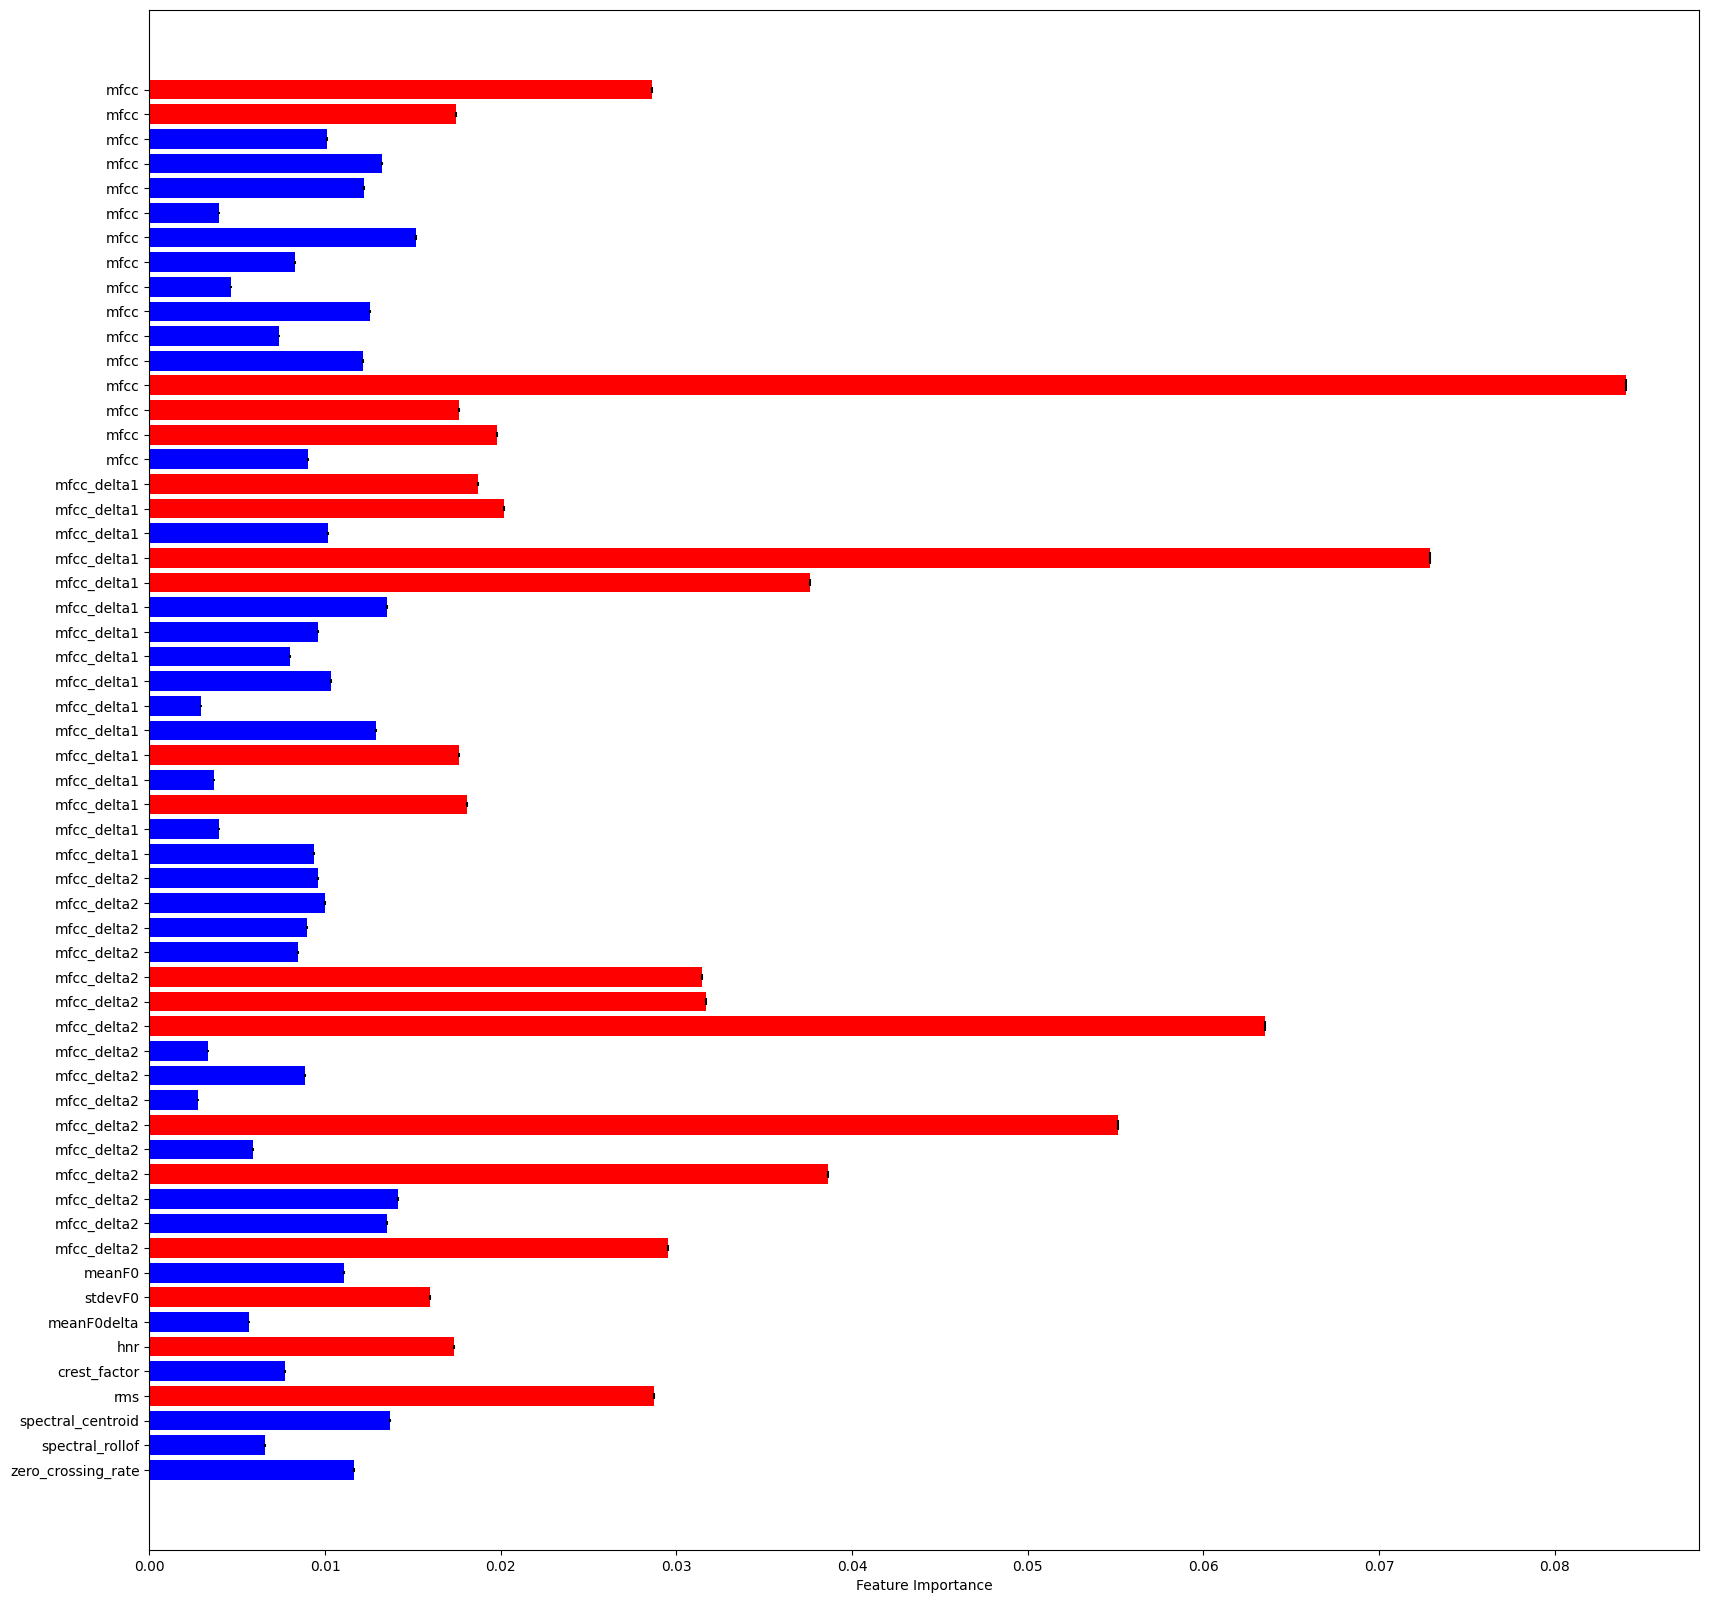

In [84]:
n_top = 20

plt.rcdefaults()

fig, ax = plt.subplots(figsize=(20,20))
top = np.argpartition(feature_importance, -n_top)[-n_top:]

colors = np.array(['blue'] * len(feature_importance))
colors[top] = 'red'

y_pos = np.arange(len(feature_names))
ax.barh(y_pos, feature_importance, yerr=std, align='center', color=colors)
ax.set_yticks(y_pos)
ax.set_yticklabels(feature_names)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Feature Importance')

plt.show()

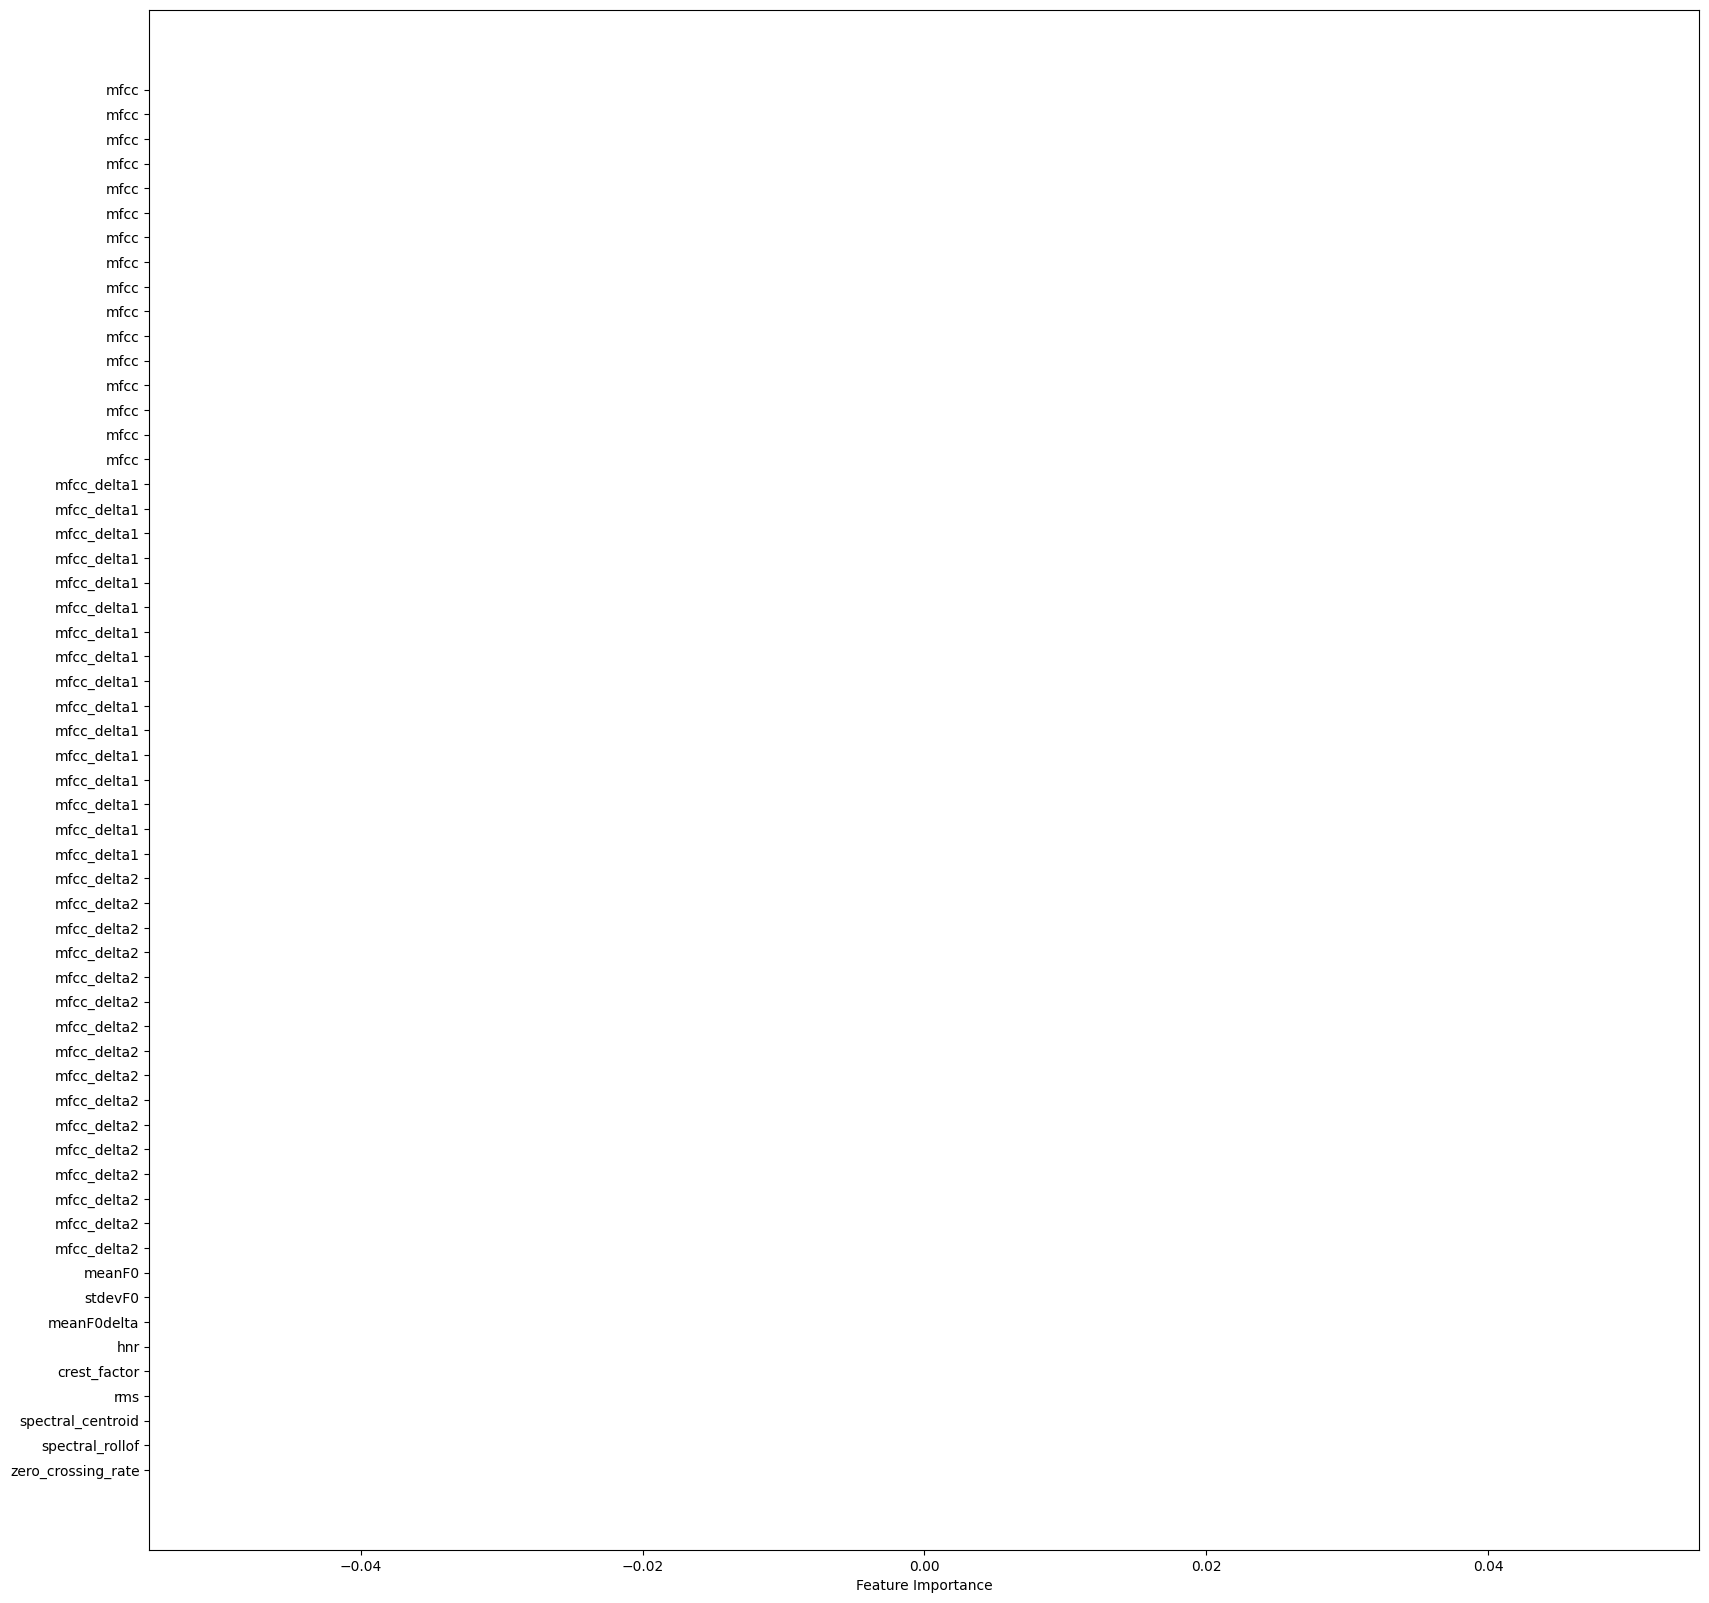

In [88]:
result = permutation_importance(
    model, x_train, y_train, n_repeats=10, random_state=42, n_jobs=-1
)

fig, ax = plt.subplots(figsize=(20,20))
top = np.argpartition(result.importances_mean, -n_top)[-n_top:]

colors = np.array(['blue'] * len(feature_importance))
colors[top] = 'red'

y_pos = np.arange(len(feature_names))
ax.barh(y_pos, result.importances_mean, yerr=result.importances_std, align='center', color=colors)
ax.set_yticks(y_pos)
ax.set_yticklabels(feature_names)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Feature Importance')

plt.show()
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()